Dataset Shape: (157, 15)

First 5 Rows:
  Manufacturer    Model  Sales_in_thousands Vehicle_type  Price_in_thousands  \
0        Acura  Integra              16.919    Passenger               21.50   
1        Acura       TL              39.384    Passenger               28.40   
2        Acura       CL              14.114    Passenger                 NaN   
3        Acura       RL               8.588    Passenger               42.00   
4         Audi       A4              20.397    Passenger               23.99   

   Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0          1.8       140.0      101.2   67.3   172.4        2.639   
1          3.2       225.0      108.1   70.3   192.9        3.517   
2          3.2       225.0      106.9   70.6   192.0        3.470   
3          3.5       210.0      114.6   71.4   196.6        3.850   
4          1.8       150.0      102.6   68.2   178.0        2.998   

   Fuel_capacity  Fuel_efficiency Latest_Launch  Power_perf_fact

C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_28540\4157928706.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


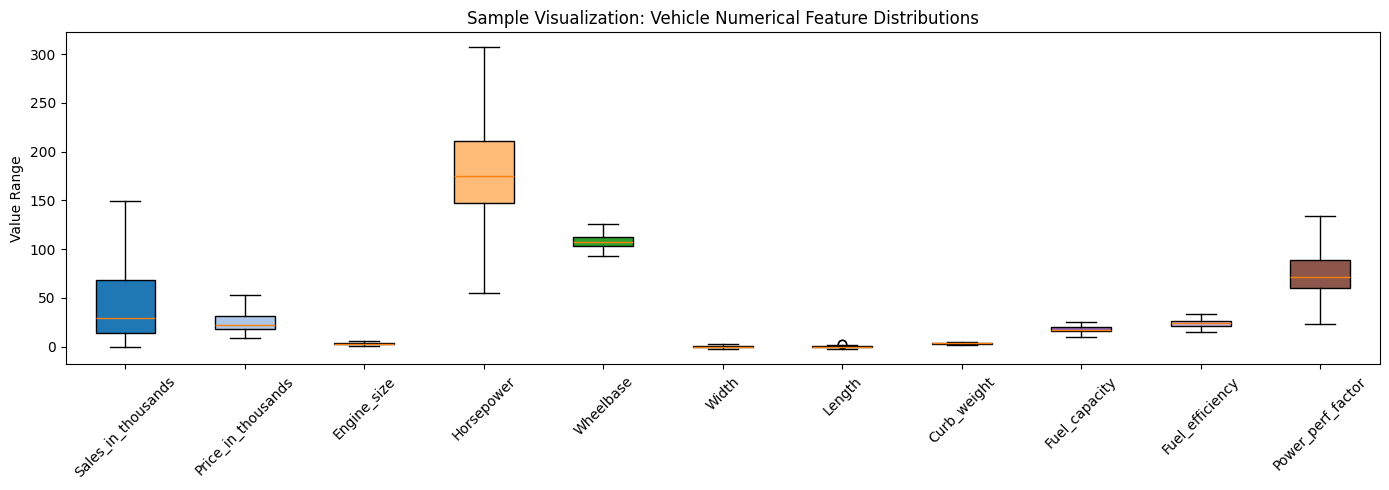

In [1]:
# =========================================================
# Vehicle Dataset – Data Quality Analysis & Preprocessing
# =========================================================

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------
# Replace with your actual CSV file name
df = pd.read_csv("ML470_S7_Vehicle_Data_Practice.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# ---------------------------------------------------------
# 3. Check Missing Values
# ---------------------------------------------------------
print("\nMissing Values Per Column:")
print(df.isnull().sum())

# Remove rows with missing values
df_clean = df.dropna()
print("\nShape After Dropping Missing Values:", df_clean.shape)

# ---------------------------------------------------------
# 4. Select Numerical Columns
# ---------------------------------------------------------
num_df = df_clean.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Columns:")
print(num_df.columns.tolist())

# ---------------------------------------------------------
# 5. Outlier Detection using IQR
# ---------------------------------------------------------
def detect_outliers_iqr(df):
    outlier_summary = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_summary[col] = count
    return outlier_summary

outliers = detect_outliers_iqr(num_df)

print("\nOutlier Count (IQR Method):")
for col, count in outliers.items():
    print(f"{col}: {count}")

# ---------------------------------------------------------
# 6. Outlier Treatment (Winsorization / Capping)
# ---------------------------------------------------------
def treat_outliers(df):
    df_treated = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_treated[col] = np.clip(df[col], lower, upper)
    return df_treated

num_df_treated = treat_outliers(num_df)

# ---------------------------------------------------------
# 7. Feature Scaling (Width & Length – CORRECTED)
# ---------------------------------------------------------
scale_cols = ['Width', 'Length']  # exact column names

scaler = StandardScaler()
num_df_treated[scale_cols] = scaler.fit_transform(num_df_treated[scale_cols])

print("\nScaled Width & Length:")
print(num_df_treated[scale_cols].head())

# ---------------------------------------------------------
# 8. (Recommended) Scale ALL Numerical Features
# ---------------------------------------------------------
scaler_all = StandardScaler()

num_df_scaled = pd.DataFrame(
    scaler_all.fit_transform(num_df_treated),
    columns=num_df_treated.columns
)

print("\nFully Scaled Dataset Preview:")
print(num_df_scaled.head())

# ---------------------------------------------------------
# 9. Sample Visualization – Box Plot (All Numerical Features)
# ---------------------------------------------------------
plt.figure(figsize=(14, 5))

box = plt.boxplot(
    [num_df_treated[col] for col in num_df_treated.columns],
    labels=num_df_treated.columns,
    patch_artist=True
)

colors = plt.cm.tab20.colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45)
plt.title("Sample Visualization: Vehicle Numerical Feature Distributions")
plt.ylabel("Value Range")
plt.tight_layout()
plt.show()
